## Breakdown of this notebook:
## Loading the dataset: Load the data and import the libraries.
## Data Cleaning:
Deleting redundant columns,
Renaming the columns,
Dropping duplicates,
Cleaning individual columns.
## Remove the NaN values from the dataset
#Some Transformations
## Regression Analysis
Linear Regression,
Decision Tree Regression,
Random Forest Regression
## Data Visualization: Using plots to find relations between the features.
Restaurants delivering Online or not,
Restaurants allowing table booking or not,
Table booking Rate vs Rate,
Best Location,
Relation between Location and Rating,
Restaurant Type,
Gaussian Rest type and Rating,
Types of Services,
Relation between Type and Rating,
Cost of Restuarant,
No. of restaurants in a Location,
Restaurant type,
Most famous restaurant chains in Bengaluru
The basic idea is analyzing the to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant and many more. I have provided the link to download the dataset at the end of this notebook.

In [3]:

#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score

In [5]:
#reading the dataset
zomato_real=pd.read_csv("C:/Users/ASHRITHA/Downloads/Zomato_reduced.csv")
zomato_real.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,...,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),liked_food_from_review,menus_combined,location_latitude,location_longitude
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,...,"North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,"['fried rice', 'soya chaap', 'kulcha', 'rice',...","['pasta,', 'lunch', 'buffet,', 'masala', 'papa...",12.915382,77.573638
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,...,"Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,"['chicken', 'fried rice', 'chicken biryan', 'c...","['momos,', 'lunch', 'buffet,', 'chocolate', 'n...",12.915382,77.573638
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining",...,"Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,"['veggies', 'egg', 'pasta', 'cake', 'chocolate...","['churros,', 'cannelloni,', 'minestrone', 'sou...",12.915382,77.573638
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,...,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,"['pulka', 'apple', 'rice with sambar', 'dosa',...","['masala', 'dosa', 'pulka', 'apple', 'rice wit...",12.915382,77.573638
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,...,"North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,"['roti', 'noodles', 'kulcha', 'pav bhaji', 'pa...","['panipuri,', 'gol', 'gappe', 'roti', 'noodles...",12.941726,77.575502


In [6]:
zomato_real.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9253 entries, 0 to 9252
Data columns (total 21 columns):
url                            9253 non-null object
address                        9253 non-null object
name                           9253 non-null object
online_order                   9253 non-null object
book_table                     9253 non-null object
rate                           9253 non-null float64
votes                          9253 non-null float64
phone                          9116 non-null object
location                       9253 non-null object
rest_type                      9216 non-null object
dish_liked                     4545 non-null object
cuisines                       9250 non-null object
approx_cost(for two people)    9253 non-null float64
reviews_list                   9253 non-null object
menu_item                      9253 non-null object
listed_in(type)                9253 non-null object
listed_in(city)                9253 non-null object
liked_

In [7]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"


In [8]:
#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)


In [9]:
#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)
zomato.info() #.info() function is used to get a concise summary of the dataframe


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 9252
Data columns (total 18 columns):
address                        4529 non-null object
name                           4529 non-null object
online_order                   4529 non-null object
book_table                     4529 non-null object
rate                           4529 non-null float64
votes                          4529 non-null float64
location                       4529 non-null object
rest_type                      4529 non-null object
cuisines                       4529 non-null object
approx_cost(for two people)    4529 non-null float64
reviews_list                   4529 non-null object
menu_item                      4529 non-null object
listed_in(type)                4529 non-null object
listed_in(city)                4529 non-null object
liked_food_from_review         4529 non-null object
menus_combined                 4529 non-null object
location_latitude              4529 non-null float64
locat

In [10]:
#Reading Column Names
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)',
       'liked_food_from_review', 'menus_combined', 'location_latitude',
       'location_longitude'],
      dtype='object')

In [11]:
#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
zomato.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'liked_food_from_review', 'menus_combined',
       'location_latitude', 'location_longitude'],
      dtype='object')

In [12]:
#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float) # Changing the cost to Float
zomato.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4529 entries, 0 to 9252
Data columns (total 18 columns):
address                   4529 non-null object
name                      4529 non-null object
online_order              4529 non-null object
book_table                4529 non-null object
rate                      4529 non-null float64
votes                     4529 non-null float64
location                  4529 non-null object
rest_type                 4529 non-null object
cuisines                  4529 non-null object
cost                      4529 non-null float64
reviews_list              4529 non-null object
menu_item                 4529 non-null object
type                      4529 non-null object
city                      4529 non-null object
liked_food_from_review    4529 non-null object
menus_combined            4529 non-null object
location_latitude         4529 non-null float64
location_longitude        4529 non-null float64
dtypes: float64(5), object(13)
memory usag

In [13]:
#Reading Rate of dataset
zomato['rate'].unique()


array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [17]:
#Encode the input Variables
def Encode(zomato):
    for column in zomato.columns[~zomato.columns.isin(['rate', 'cost', 'votes'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(zomato.copy())


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city', 'liked_food_from_review', 'menus_combined',
       'location_latitude', 'location_longitude'],
      dtype='object')

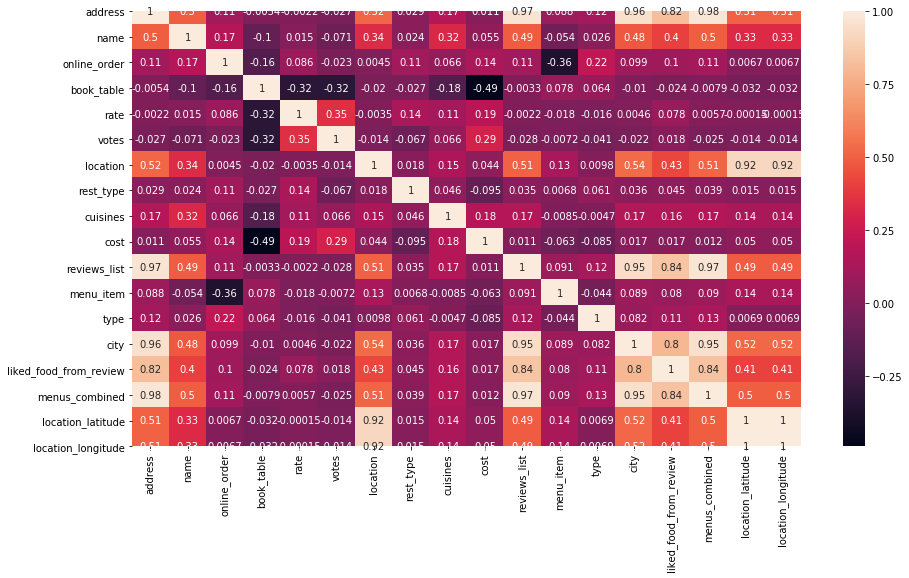

In [18]:
#Get Correlation between different variables
corr = zomato_en.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
plt.savefig("correlation.png")
zomato_en.columns


The highest correlation is between name and address which is 0.62 which is not of very much concern¶


# Regression Analysis¶


 Splitting the Dataset¶


In [19]:
#Defining the independent variables and dependent variables
x = zomato_en.iloc[:,[2,3,5,6,7,8,9,11]]
y = zomato_en['rate']
#Getting Test and Training Set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)
x_train.head()
y_train.head()


5899    4.0
2479    4.4
9081    2.9
4836    4.2
9154    4.2
Name: rate, dtype: float64

# Linear Regression¶


In [20]:
#Prepare a Linear Regression Model
reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)


0.1387404813110601

# Decision Tree Regression¶


In [21]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=105)
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)
y_predict=DTree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

-0.4332552913952612

# Random Forest Regression¶


In [22]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RForest.fit(x_train,y_train)
y_predict=RForest.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.2968291925031551

# Extra Tree Regression¶


In [24]:
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)
y_predict=ETree.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_predict)


0.2374988268312057

## Data Visualization¶


Restaurants delivering Online or not


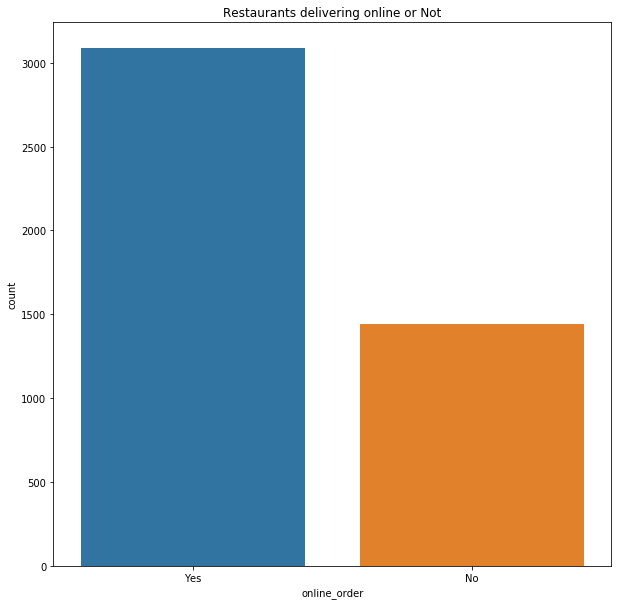

In [25]:
#Restaurants delivering Online or not
sns.countplot(zomato['online_order'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')
plt.savefig("online.png")


Restaurants allowing table booking or not¶


Text(0.5, 1, 'Restaurants allowing table booking or not')

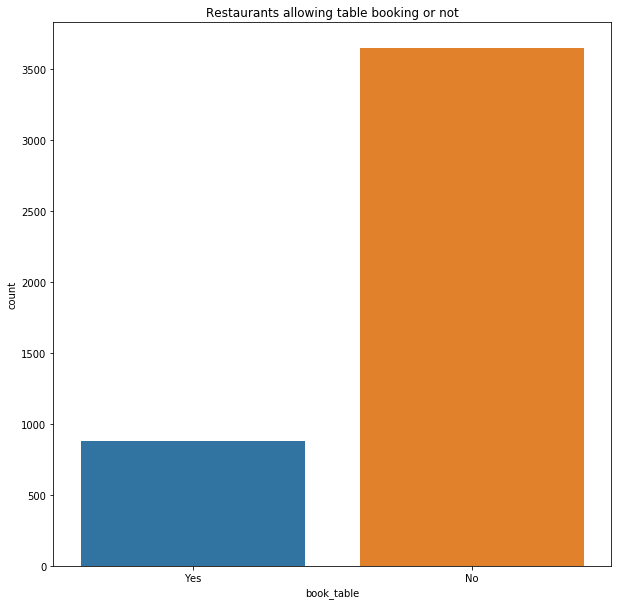

In [26]:
sns.countplot(zomato['book_table'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.savefig("Book_Table.png")
plt.title('Restaurants allowing table booking or not')


Table booking Rate vs Rate¶


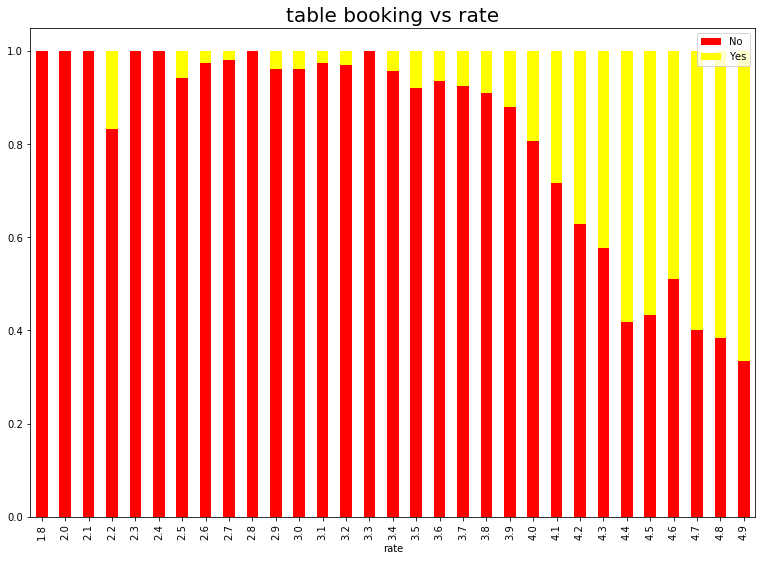

In [27]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato['rate'], zomato['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.savefig("Table_Booking_Rate.png")
plt.show()


Location¶


Text(0.5, 1, 'Location')

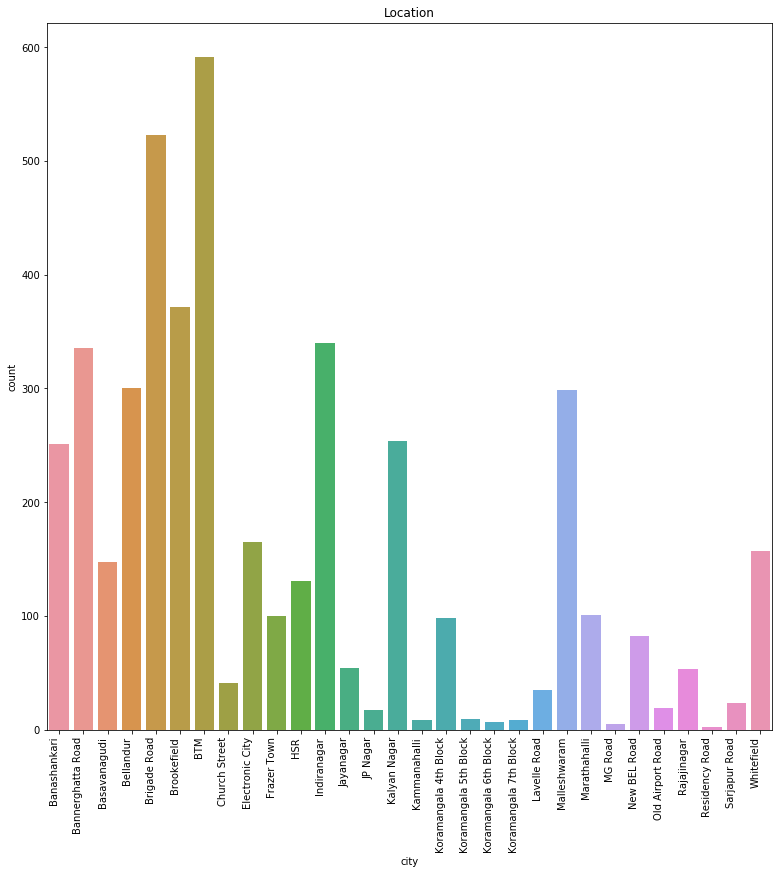

In [28]:
sns.countplot(zomato['city'])
sns.countplot(zomato['city']).set_xticklabels(sns.countplot(zomato['city']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.savefig("Location.png")
plt.title('Location')


Location and Rating¶


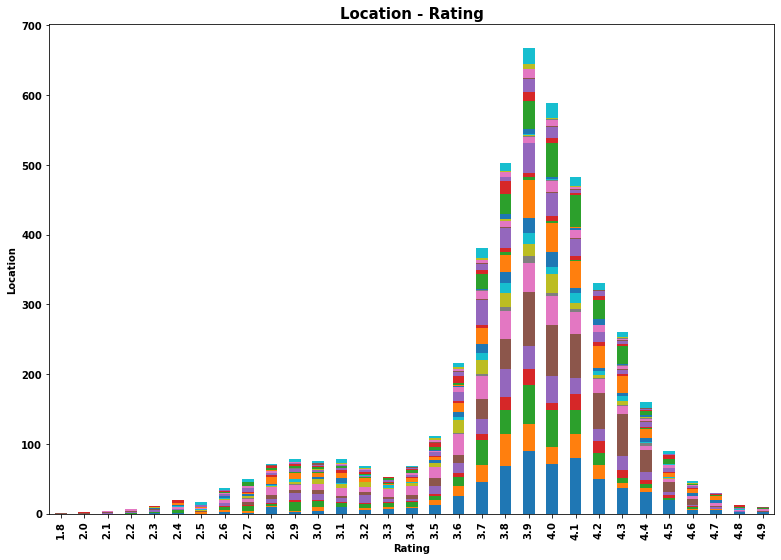

In [29]:
loc_plt=pd.crosstab(zomato['rate'],zomato['city'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig("Location Rating.png")


Restaurant Type¶


Text(0.5, 1, 'Restuarant Type')

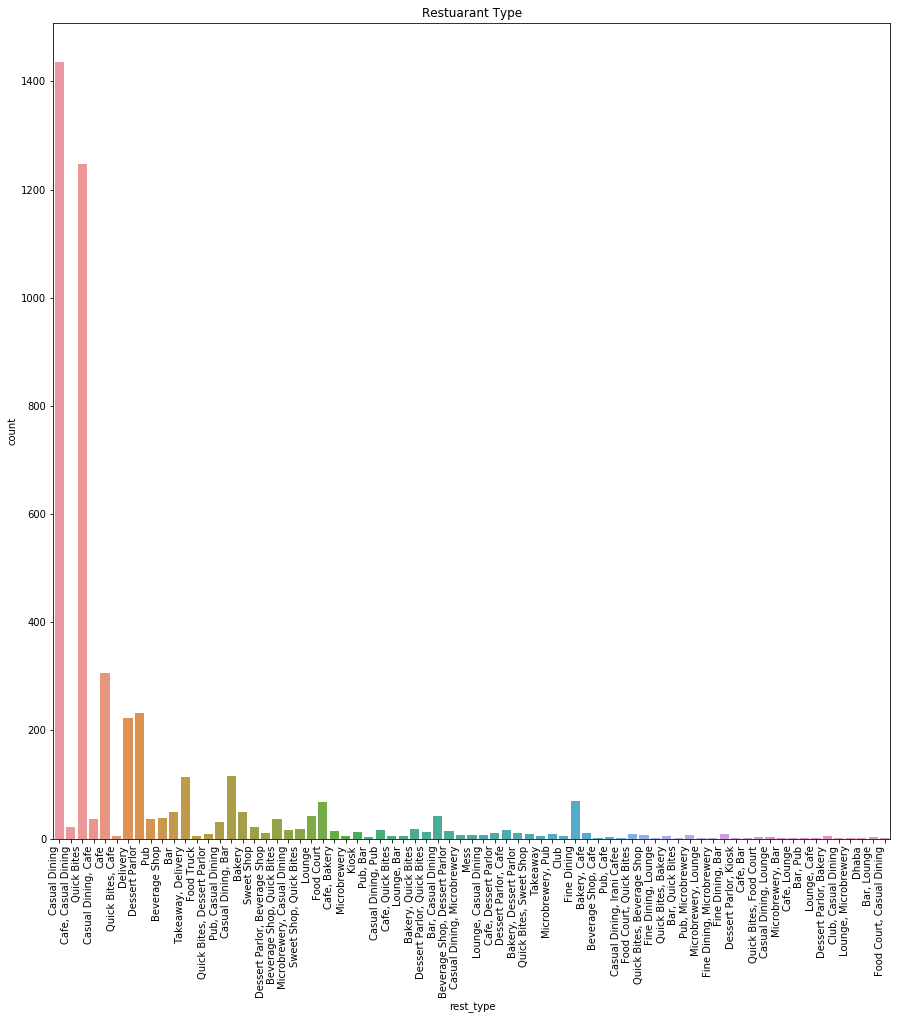

In [30]:
sns.countplot(zomato['rest_type'])
sns.countplot(zomato['rest_type']).set_xticklabels(sns.countplot(zomato['rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.savefig("Restuarant Type")
plt.title('Restuarant Type')


Gaussian Rest type and Rating¶


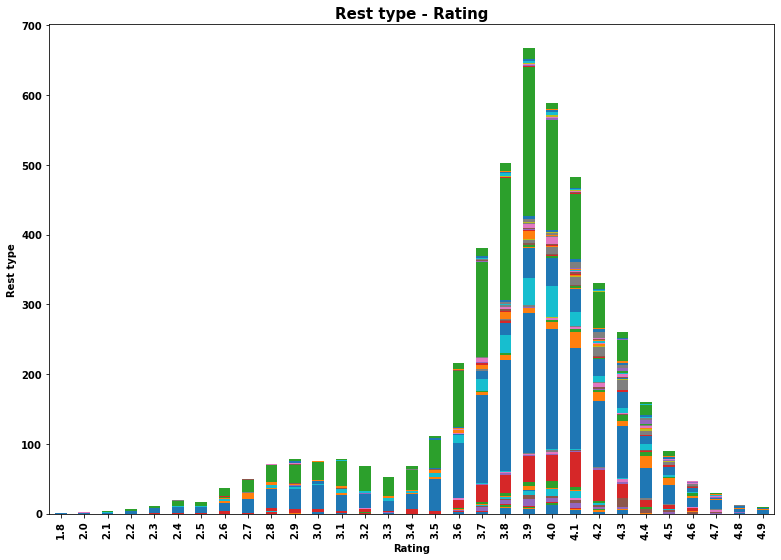

In [31]:
loc_plt=pd.crosstab(zomato['rate'],zomato['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();
plt.savefig('Rest Type-Rating')


Types of Services¶


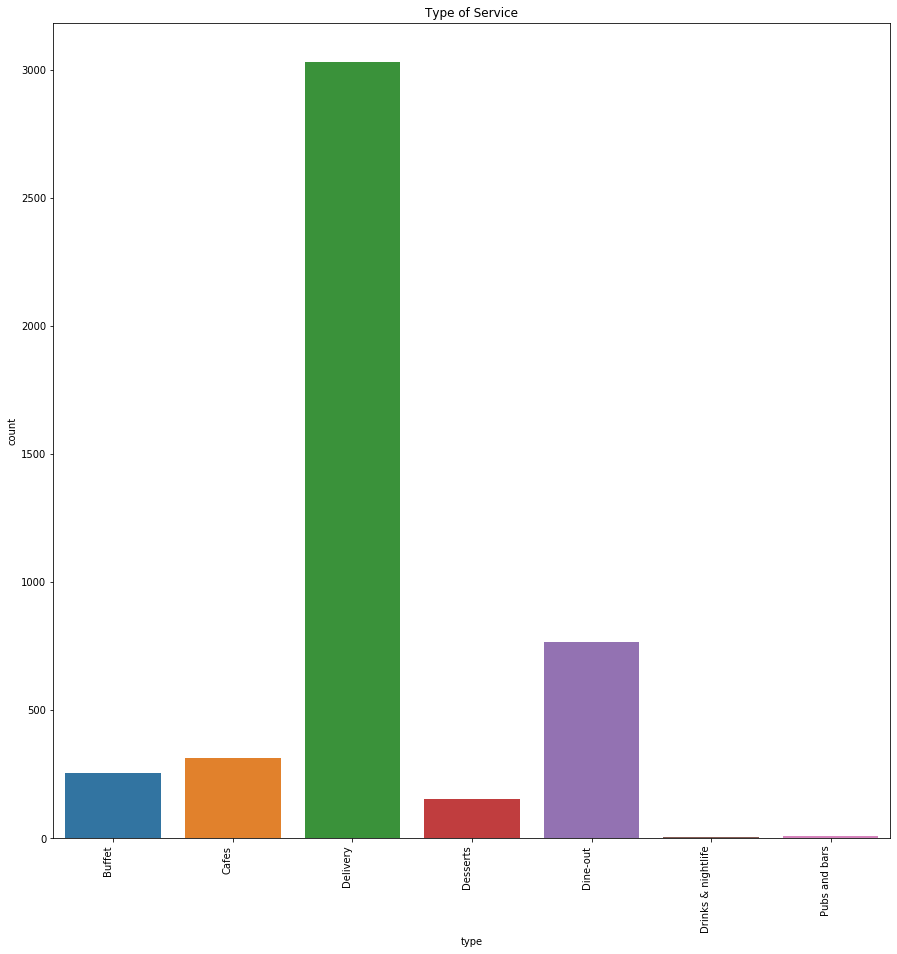

In [32]:
sns.countplot(zomato['type'])
sns.countplot(zomato['type']).set_xticklabels(sns.countplot(zomato['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Type of Service')
plt.savefig('Types of Service')


Type and Rating¶


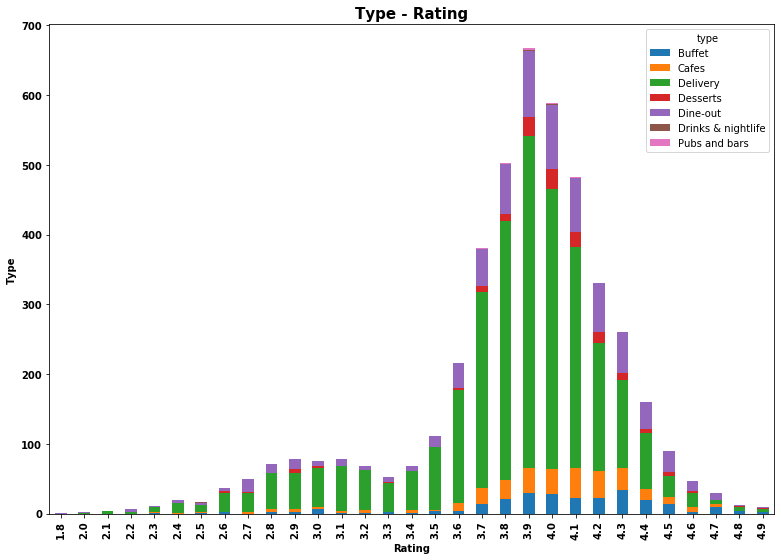

In [33]:
type_plt=pd.crosstab(zomato['rate'],zomato['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.savefig('Type and Rating')


Cost of Restuarant¶


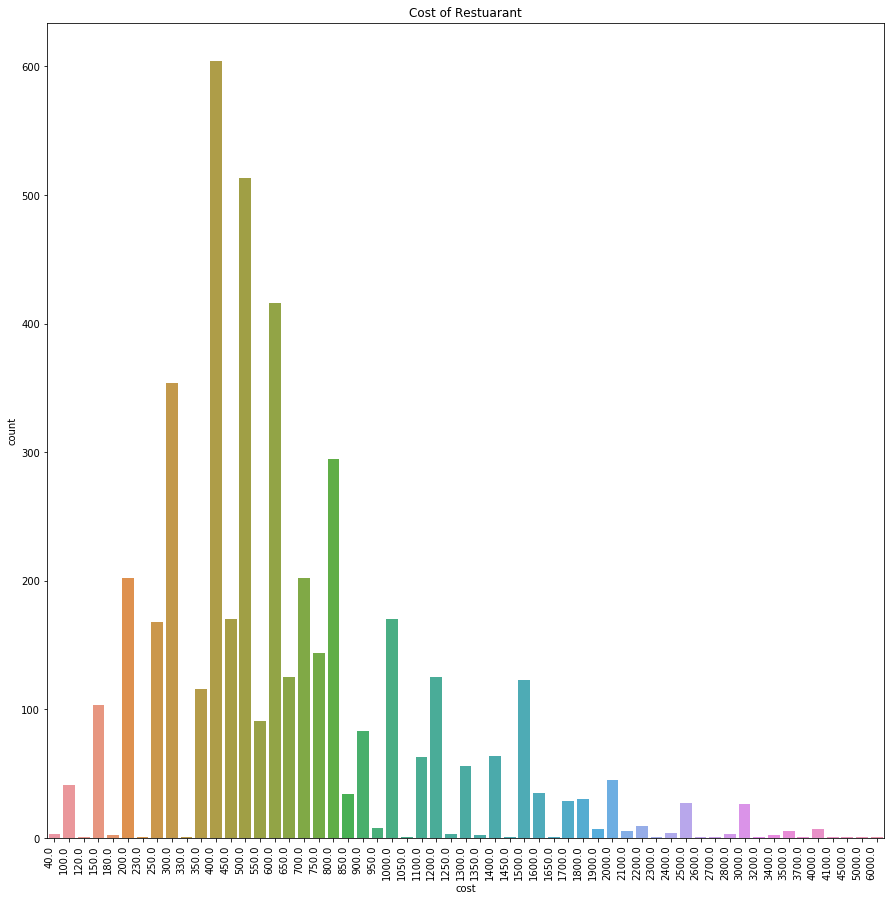

In [34]:
sns.countplot(zomato['cost'])
sns.countplot(zomato['cost']).set_xticklabels(sns.countplot(zomato['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')
plt.savefig('Cost of Restaurant')


No. of Restaurants in a Location


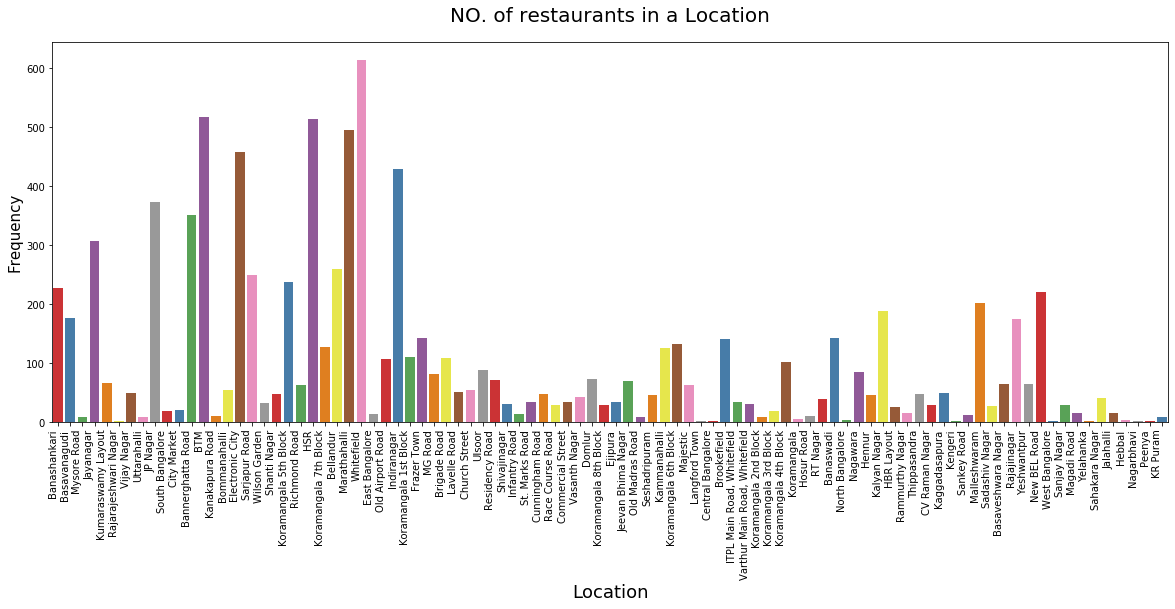

In [35]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)
plt.savefig("Restaurants in Location")


Restaurant type¶


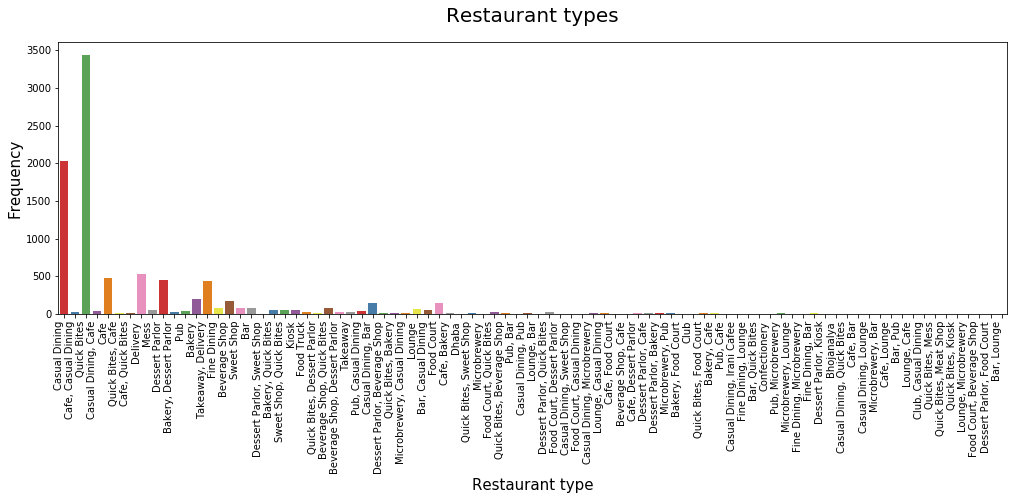

In [36]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)
plt.savefig('Restaurant types')


Most famous Restaurant chains in Bengaluru¶


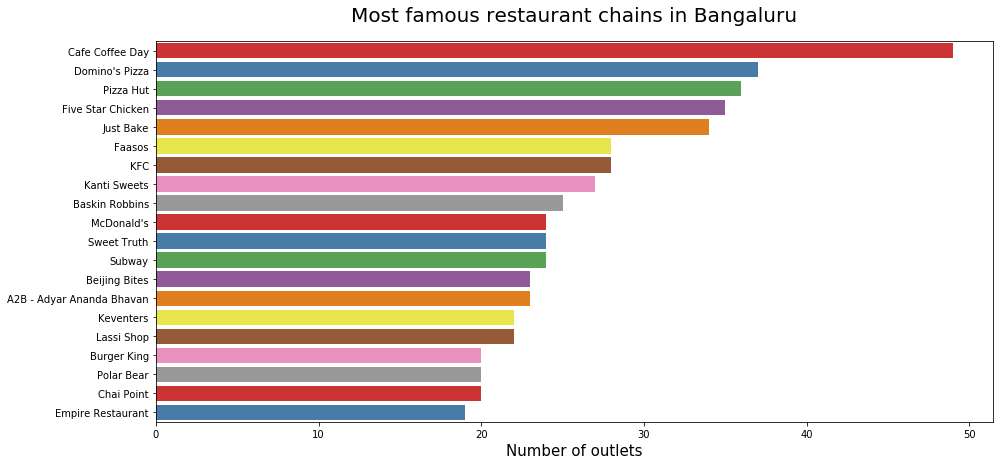

In [37]:
plt.figure(figsize=(15,7))
chains=zomato_real['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)
plt.savefig('Most famous restaurant chains')


The Dataset can be downloaded here - https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants/downloads/zomato-bangalore-restaurants.zip/1

